In [33]:
models = [i for i in ["trained_iris_model_11_5", "trained_iris_model_14_11", "trained_iris_model_5_11_8", "trained_iris_model_14_5", "trained_iris_model_big"]]
executable_path = "inference/.stack-work/dist/ab060f89/build/inference-exe/inference-exe.exe"

models

['trained_iris_model_11_5',
 'trained_iris_model_14_11',
 'trained_iris_model_5_11_8',
 'trained_iris_model_14_5',
 'trained_iris_model_big']

In [13]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = "iris_generated_unlab.csv"
X = np.array(pd.read_csv(data))
X.shape

(20150, 4)

In [18]:
RUNS = 10

In [30]:
from timeit import default_timer as timer
from subprocess import run
from os.path import abspath

In [42]:
sklearn_times = {model: [] for model in models}
haskell_times = {model: [] for model in models}

for model in models:
	with open("models/" + model + ".pkl", "rb") as f:
		ffn = pickle.load(f)
	
	for i in range(RUNS):
		start = timer()
		ffn.predict_proba(X)
		end = timer()
		sklearn_times[model].append(end - start)

	for i in range(RUNS):
		res = run([executable_path, "weights/" + model + ".txt", data, "unger", "bunger"], capture_output = True)
		out = str(res.stdout)
		time = float(out.split(":")[1].replace("\\r", "").replace("\\n", "").replace("s", "").replace("'", "").strip())
		haskell_times[model].append(time)

	
	
print(sklearn_times)
print(haskell_times)

c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
 

{'trained_iris_model_11_5': [0.004203199991025031, 0.0038109000015538186, 0.004416899988427758, 0.00342550000641495, 0.004761399992275983, 0.0031891999824438244, 0.004270399978850037, 0.003967399999964982, 0.0034556000027805567, 0.004499999980907887], 'trained_iris_model_14_11': [0.0048386999987997115, 0.0037167000118643045, 0.006060799991246313, 0.00867479998851195, 0.0046771000197622925, 0.005336200003512204, 0.004685899999458343, 0.004733300011139363, 0.0046888000215403736, 0.003803100000368431], 'trained_iris_model_5_11_8': [0.0044234999804757535, 0.004051600000821054, 0.004207400023005903, 0.0038626999885309488, 0.0037628999853041023, 0.004034000012325123, 0.003805700020166114, 0.0038191000057850033, 0.004995800001779571, 0.004869800002779812], 'trained_iris_model_14_5': [0.003989100019680336, 0.0036211000115145, 0.0036965999752283096, 0.003215599979739636, 0.0031527999963145703, 0.003492800024105236, 0.003256399999372661, 0.003450499993050471, 0.0033027000026777387, 0.00340139999

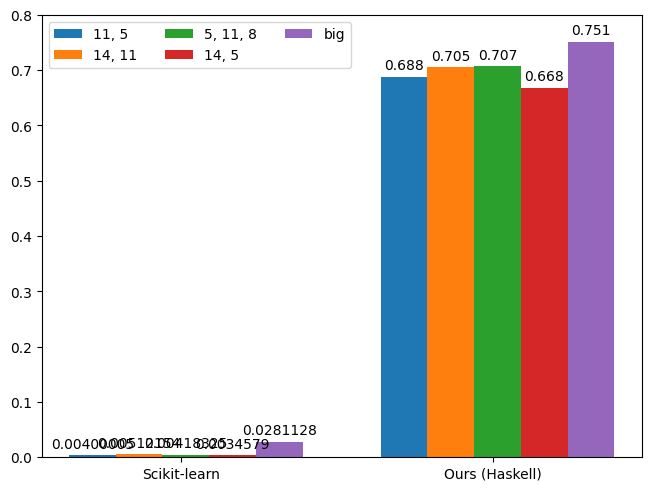

In [68]:
sklearn_avgs = {", ".join(key.split("_")[3:]): np.average(val) for (key, val) in sklearn_times.items()}
haskell_avgs = {", ".join(key.split("_")[3:]): np.average(val) for (key, val) in haskell_times.items()}

x_keys = ["Scikit-learn", "Ours (Haskell)"]
vals = {
	key: (sklearn_avgs[key], haskell_avgs[key]) for key in sklearn_avgs.keys()
}

x = np.arange(len(x_keys))
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width * 1.9, x_keys)
ax.legend(loc='upper left', ncols=3)

ax.set_ylim(0, 0.8)

plt.show()
fig.savefig("benchmark.png")